# K-means clustering

In [106]:
from sklearn.datasets import make_blobs
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist


In [126]:
n_samples = 300
random_state= 42
n_centroids = 4
X,y = make_blobs(n_samples=n_samples, 
centers= n_centroids,
random_state= random_state)

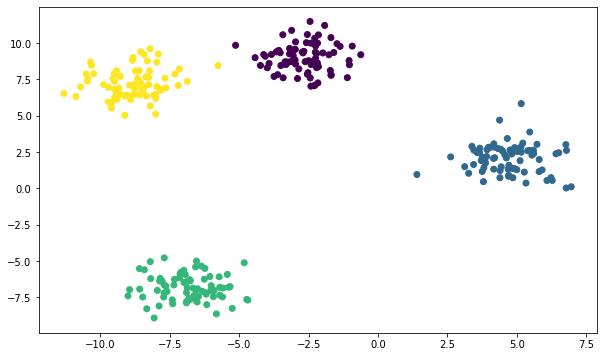

In [127]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [128]:
class Kmeans():
    def __init__(self, n_clusters):
        self.K = n_clusters
        self.labels = []
        self.centroids = []
        self.count = 0

    def init_centroids(self, X):
        return X[np.random.choice(X.shape[0], self.K, replace=False)]
    def assign_label(self, X):
        D = cdist(X, self.centroids[-1])
        return np.argmin(D, axis=1)

    def has_converged(self, new_centroids):
        return set([tuple(a) for a in self.centroids[-1]]) == set([tuple(a) for a in new_centroids])

    def update_centroids(self, X ):
        centroids = np.zeros((self.K, X.shape[1]))
        for k in range(self.K):
            Xk = X[self.labels[-1] == k, :]
            centroids[k,:] = np.mean(Xk, axis=0)
        return centroids
    
    def fit(self, X):
        self.centroids = [self.init_centroids(X)]
        while True:
            self.labels.append(self.assign_label(X))
            new_centroids = self.update_centroids(X)
            if self.has_converged(new_centroids):
                break
            self.centroids.append(new_centroids)
            self.count += 1

    def predict(self,X):
        self.fit(X)
        return self.labels[-1]
    
    

In [131]:
n_clusters = 4

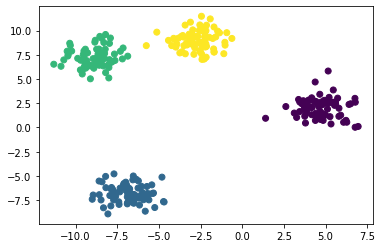

In [133]:
my_kmeans = Kmeans(n_clusters)
labels = my_kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)